# Run ADAM 

The model ADAM (Annual Danish Aggregate Model)is a model of the Danish
economy maintained and developed by Danmarks Statistik.  A Link to the model: https://www.dst.dk/pubomtale/18836. It has 4624 equations 

Danmarks Statistik has kindly provided the model version JUN17X and an associated databank for this demo. 

The model and databank is not the current model and forecast, but serves as an example. 

This is a basic demo. However you can use all the features of ModelFlow to manipulate the model.


## Import ModelFlow and Pandas

In [2]:
import pandas as pd
from modelclass import model 
model.modelflow_auto()

In [3]:
turbo = 0 # set turbo = 1 to compile the model (takes some time), but the model runs very fast
          # if you set turbo = 1 the notebook should be re-calculated - press cell>run all in the menu

## Read model and databank

In [4]:
fadam = open('adam/jul17x.txt','rt').read()
bank  = pd.read_pickle('adam/lang100_2017.pc') 

## Make a model instance 

In [5]:
madam = model(fadam,modelname='ADAM')    

## Run the Baseline 

In [6]:
basedf = madam(bank,2018,2030,max_iterations=200,alfa=0.3,silent=1,ljit=turbo)
madam.modeldump('baseline.pcim') # the model and data are dumped 

# Make an experiment reducing  value added tax

In [7]:
altdf = model.update_from_list(basedf, 'tg + -0.01 2018 2030')
result  = madam(altdf)

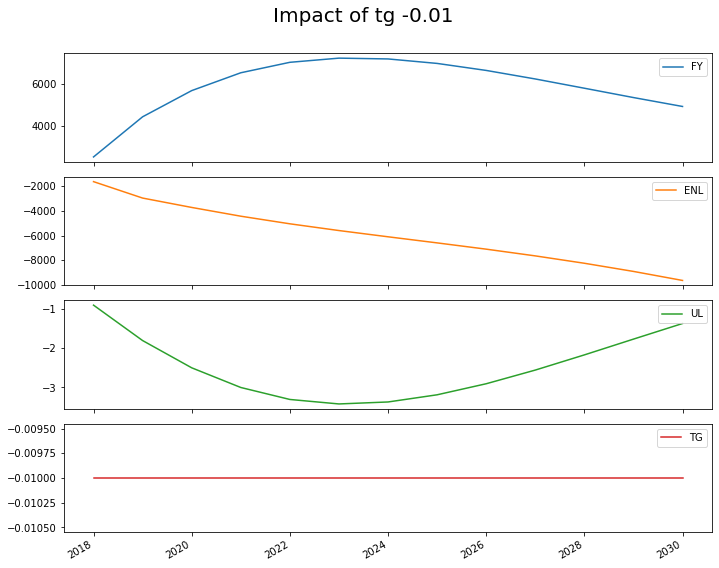

In [8]:
madam['fy enl ul tg'].dif.plot(colrow=1,sharey=0,title='Impact of tg -0.01');

# Make a range of eksperiments 

In [9]:
for tg_update in [0.0,0.01,0.02,0.03]:                                        # Loop over values for change in tg (value added tax rate)  
    eksdf = model.update_from_list(basedf,f'tg + {tg_update} 2018 2030')      # Update the baseline dataframe
    madam(eksdf,keep = f'Value added tax: change = {tg_update}',relconv=0.00001,silent=1);  # Run the model 

# Show the results for eksperiments 

In [10]:
madam.keep_viz('fy fm enl ul')

interactive(children=(SelectionRangeSlider(continuous_update=False, description='Show interval', index=(27, 39…